# Data Loading and Initial Exploration
Begin by importing the necessary library and loading the dataset into a Pandas DataFrame to facilitate data manipulation and analysis.

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set style for visualizations
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:

# Load the dataset
df = pd.read_csv('./data/train.csv')

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (891, 12)


In [20]:
print("Data types and missing values:")
display(df.info())

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [21]:
print("Descriptive statistics:")
display(df.describe(include='all'))

Descriptive statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Initial Observations:
. 891 rows, 12 columns

. Missing values in Age, Cabin, and Embarked

. Mixed data types (numeric and categorical)

. Need to understand each feature's meaning

# Data Cleaning
Handling missing data is crucial. We fill missing ages with the median age, drop rows where 'Embarked' is missing, and remove the 'Cabin' column due to a high number of missing values.

In [22]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [23]:
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [24]:
# Drop rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

In [25]:
# Drop the 'Cabin' column due to excessive missing values
df.drop('Cabin', axis=1, inplace=True)

In [26]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [27]:
# Verify changes
print("After cleaning - missing values:")
display(df.isnull().sum())

After cleaning - missing values:


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering
We engineer new features that might be predictive. 'FamilySize' combines siblings/spouses and parents/children aboard. 'Title' extracts honorifics from names, which can be indicative of social status.

In [28]:
# Create a new column 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create is alone feature
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 120], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])

# Create fare bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Display new features
print("New features:")
display(df[['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin']].head())


New features:


,FamilySize,IsAlone,Title,AgeBin,FareBin
0,2,0,Mr,Adult,Low
1,2,0,Mrs,Adult,Very High
2,1,1,Miss,Adult,Medium
3,2,0,Mrs,Adult,Very High
4,1,1,Mr,Adult,Medium


# Data Visualization
 Plot survival counts, survival by sex, and age distribution to identify patterns.

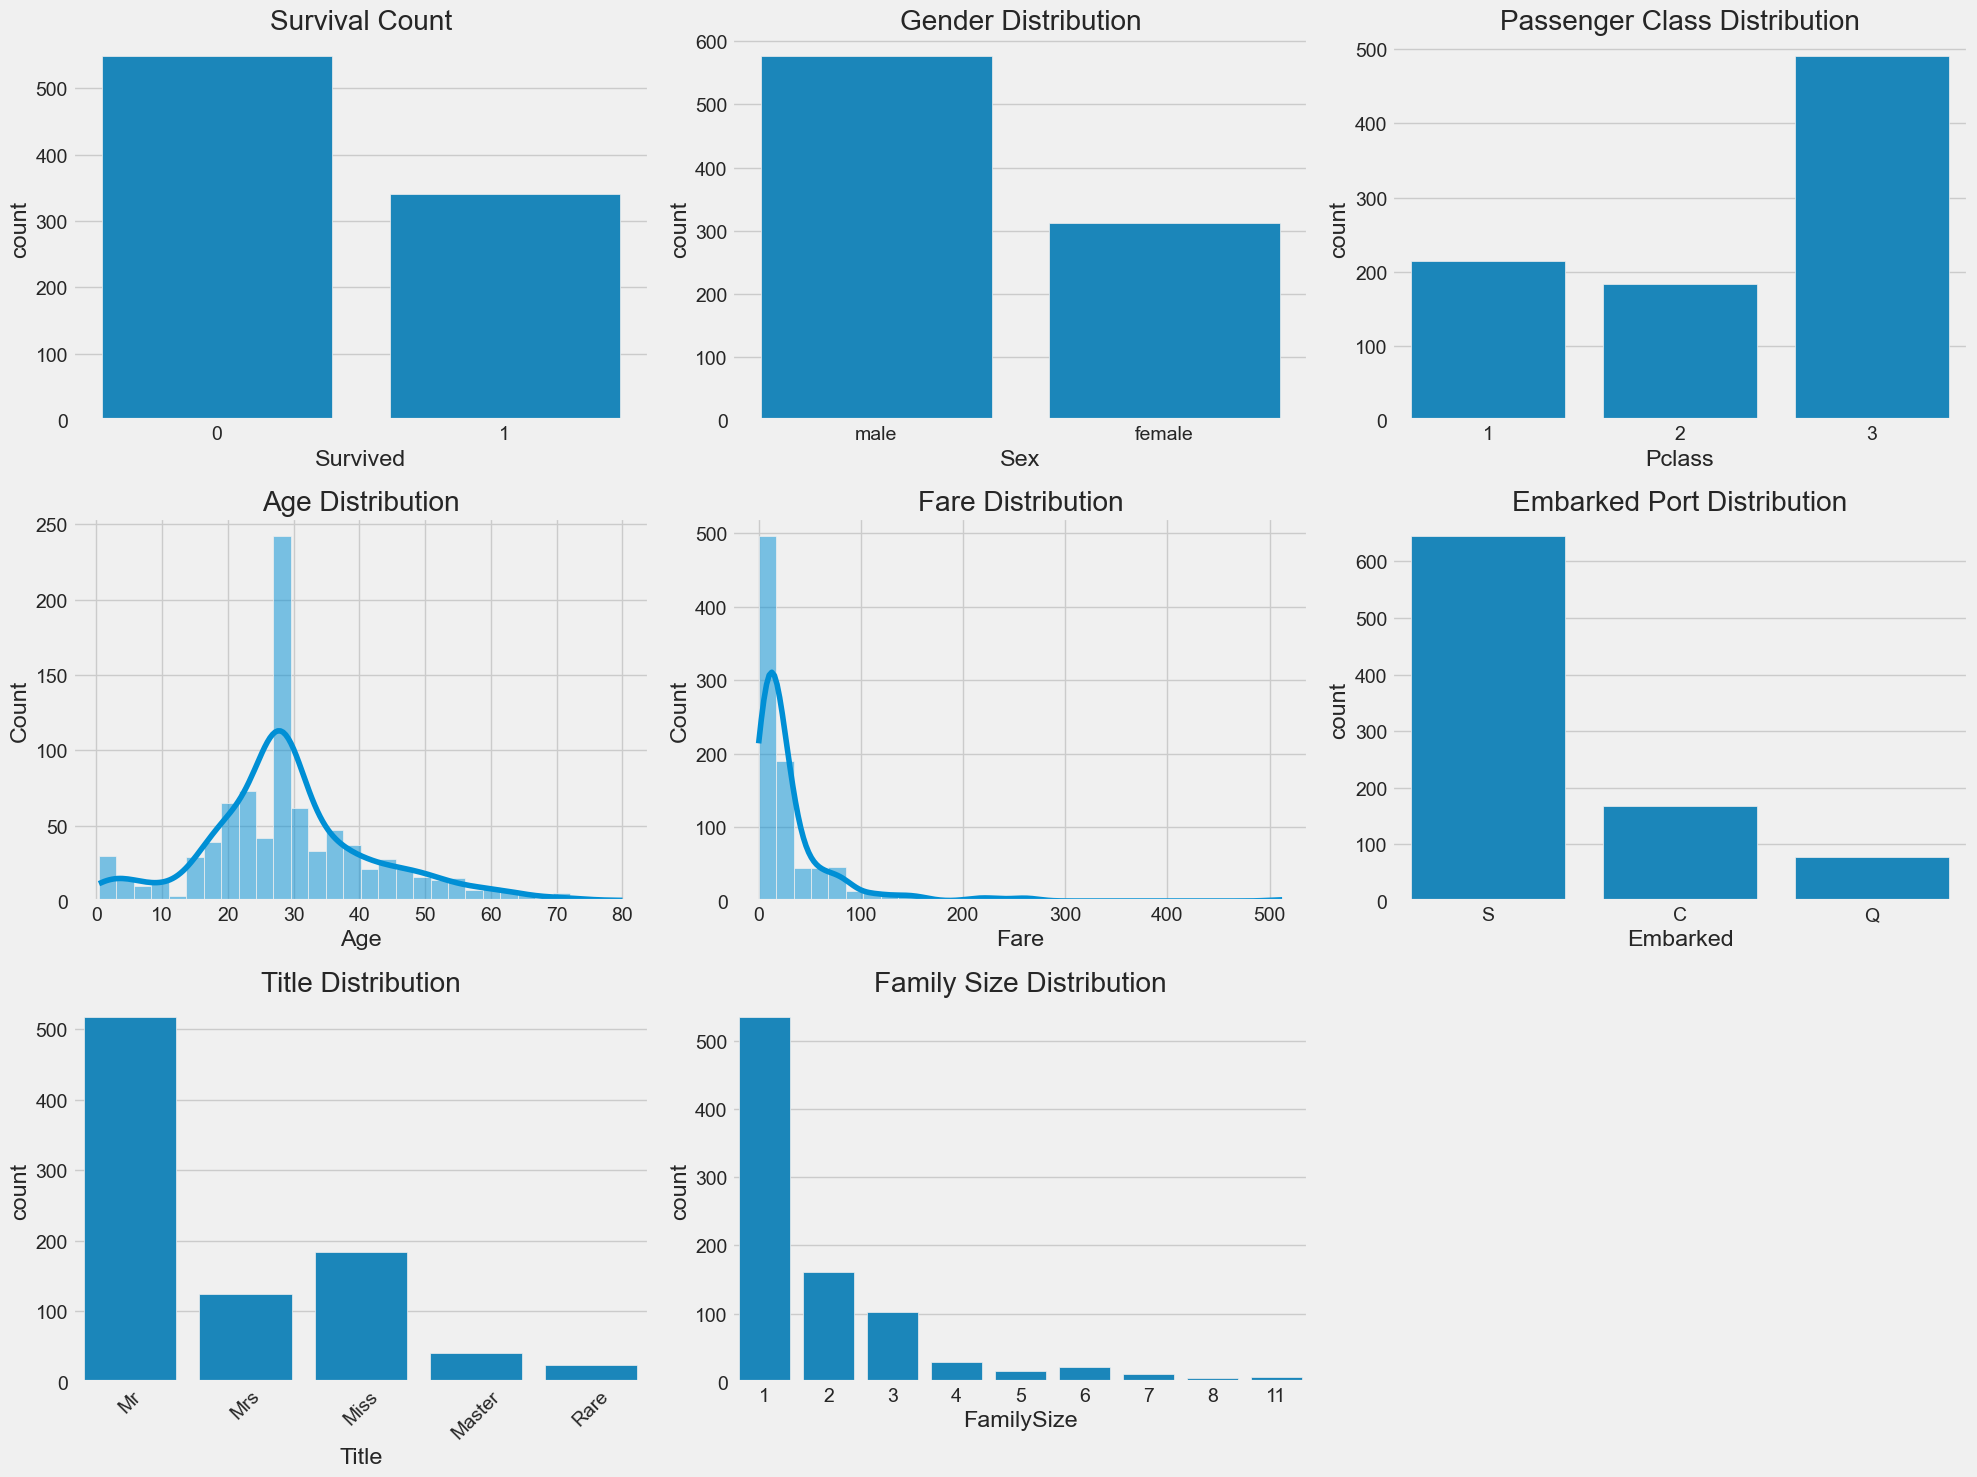

In [29]:
## Univariate Analysis

# Set up figure
plt.figure(figsize=(20, 15))

# Survival rate
plt.subplot(3, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')


# Sex distribution
plt.subplot(3, 3, 2)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')

# Pclass distribution
plt.subplot(3, 3, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

# Age distribution
plt.subplot(3, 3, 4)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Fare distribution
plt.subplot(3, 3, 5)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

# Embarked distribution
plt.subplot(3, 3, 6)
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Port Distribution')

# Title distribution
plt.subplot(3, 3, 7)
sns.countplot(x='Title', data=df)
plt.title('Title Distribution')
plt.xticks(rotation=45)

# Family size distribution
plt.subplot(3, 3, 8)
sns.countplot(x='FamilySize', data=df)
plt.title('Family Size Distribution')

plt.tight_layout()
plt.show()

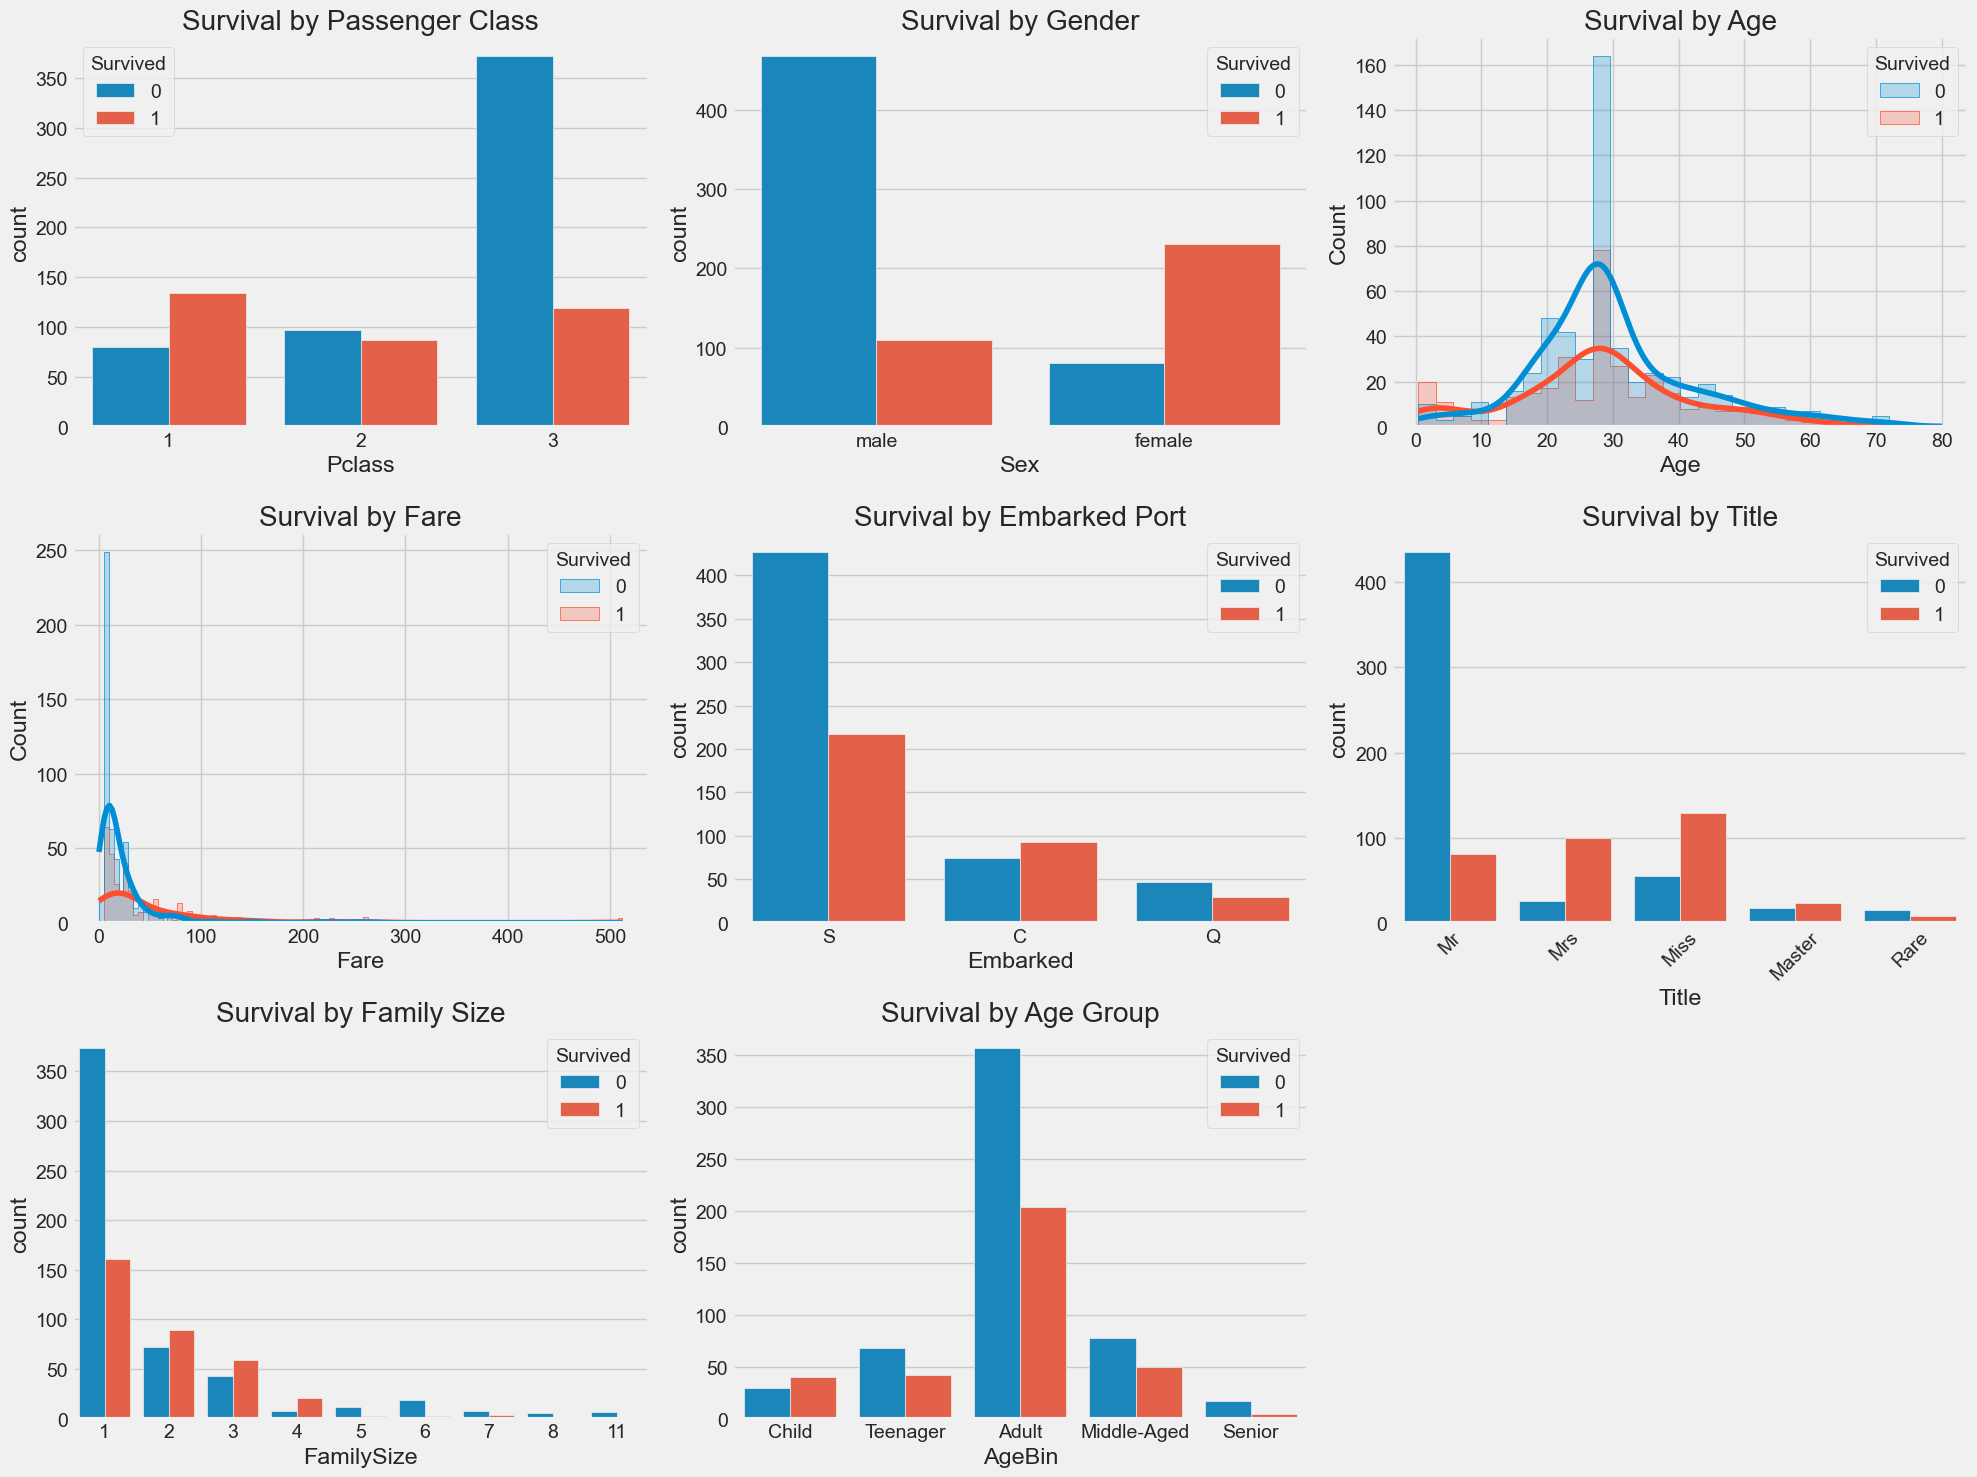

In [30]:
## Bivariate Analysis

# Set up figure
plt.figure(figsize=(20, 15))

# Survival by Pclass
plt.subplot(3, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')

# Survival by Sex
plt.subplot(3, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')

# Survival by Age
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='Age', hue='Survived', element='step', kde=True)
plt.title('Survival by Age')

# Survival by Fare
plt.subplot(3, 3, 4)
sns.histplot(data=df, x='Fare', hue='Survived', element='step', kde=True)
plt.title('Survival by Fare')

# Survival by Embarked
plt.subplot(3, 3, 5)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')

# Survival by Title
plt.subplot(3, 3, 6)
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival by Title')
plt.xticks(rotation=45)

# Survival by Family Size
plt.subplot(3, 3, 7)
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')

# Survival by Age Bin
plt.subplot(3, 3, 8)
sns.countplot(x='AgeBin', hue='Survived', data=df, order=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])
plt.title('Survival by Age Group')

plt.tight_layout()
plt.show()

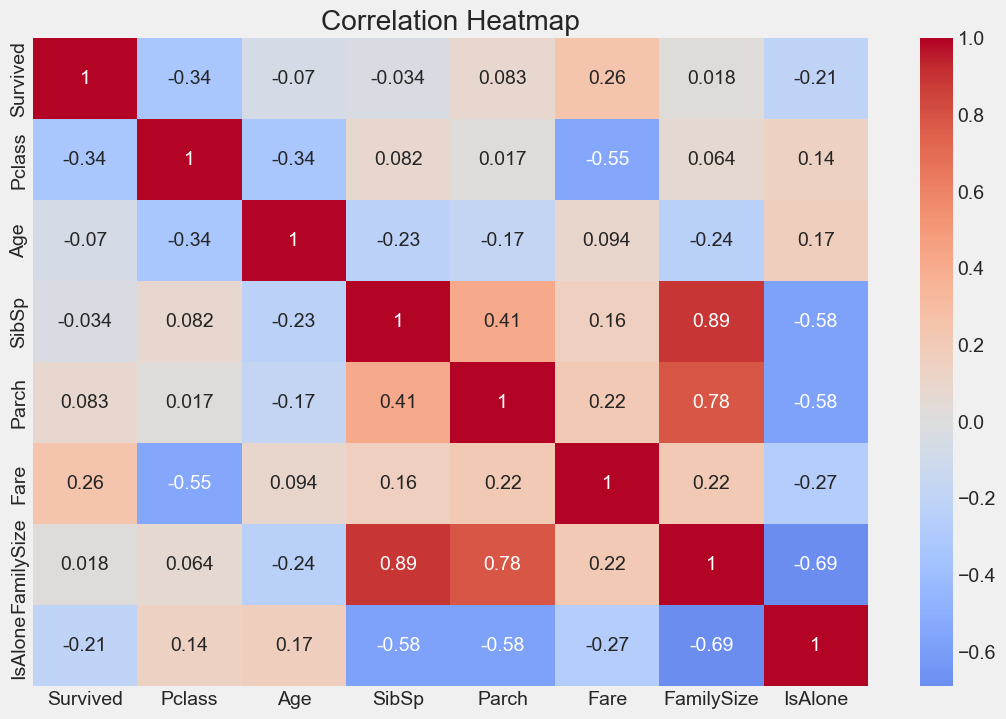

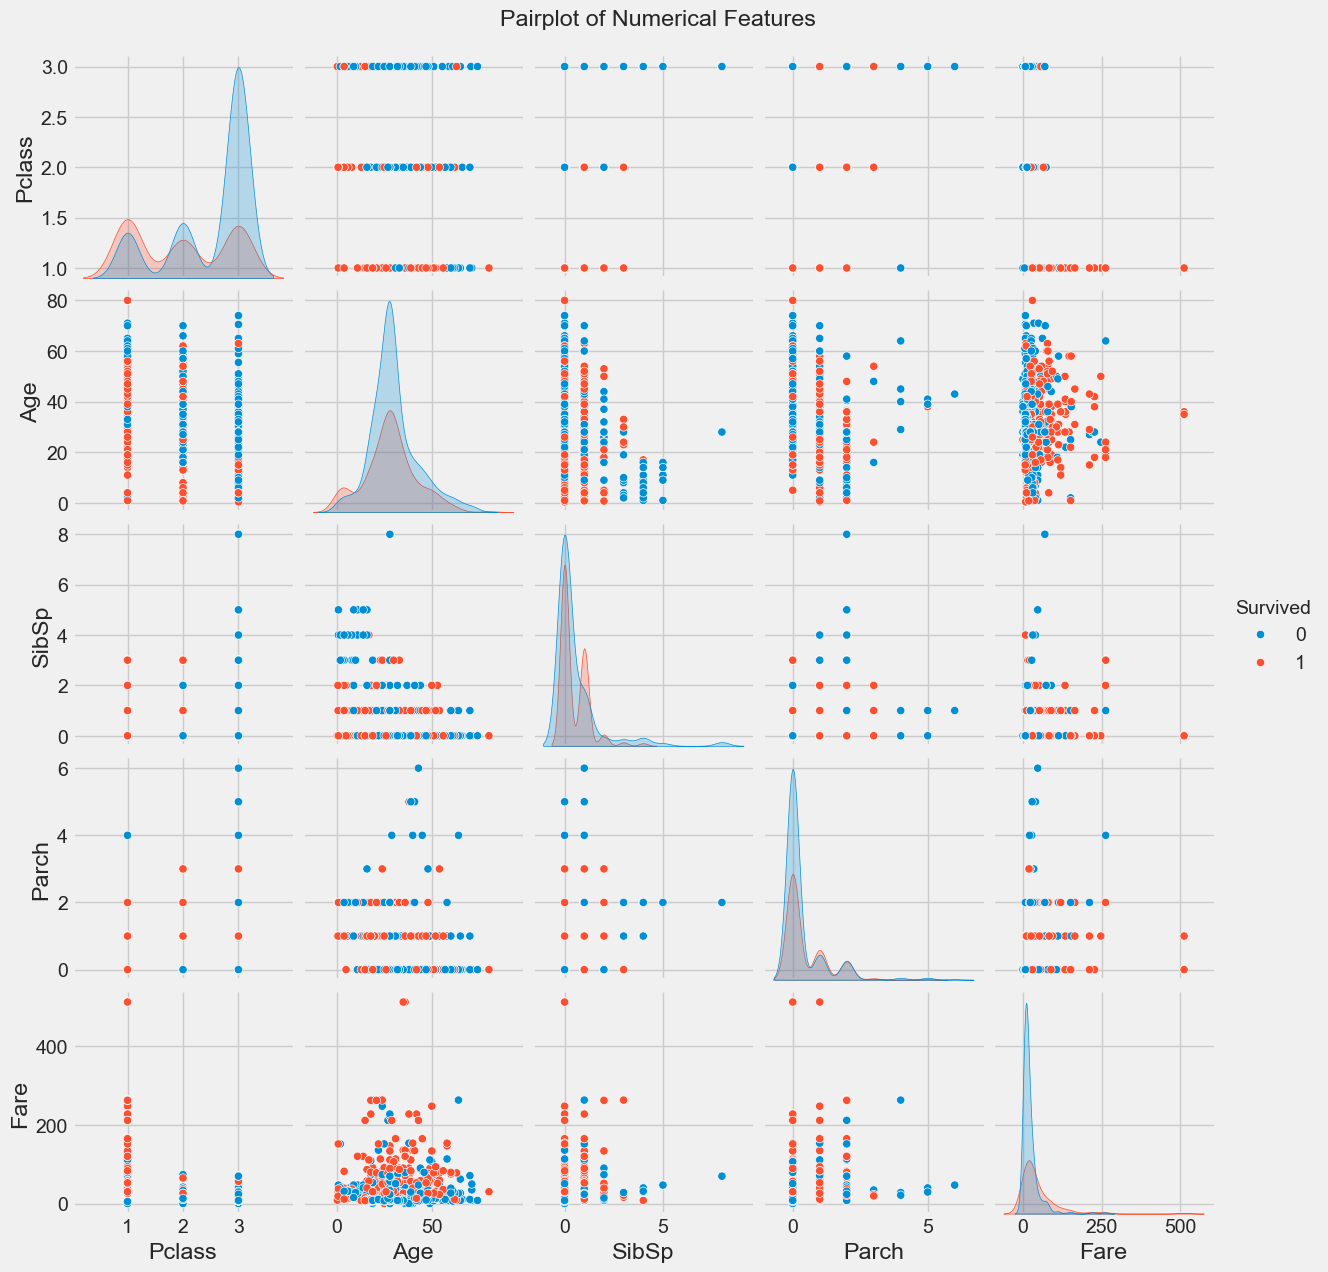

In [31]:
## Multivariate Analysis

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of numerical features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Interactive plot of Age vs Fare colored by Survival
fig = px.scatter(df, x='Age', y='Fare', color='Survived', 
                 hover_data=['Name', 'Sex', 'Pclass'],
                 color_continuous_scale='Cividis',
                 title='Age vs Fare Colored by Survival')
fig.show()

# Key insights:

. Survival Rate: Only about 38% of passengers survived.

. Class Mattered: 1st class passengers had higher survival rates (63%) compared to 3rd class (24%).

. Women and Children First: Females had a 74% survival rate vs 19% for males. Children (<12) had higher survival rates.

. Family Size Impact: Passengers traveling alone had lower survival rates than those with small families.

. Fare Correlation: Higher fare-paying passengers had better survival chances.

. Embarked Port: Passengers from Cherbourg had higher survival rates (55%) compared to others.